In [1]:
import pandas as pd
from Bio import SeqIO
import re
import matplotlib.pyplot as plt
import seaborn as sns

orfipy data/test_contigs_2024-04-09_non_cellular_.fasta --min 300 --pep PEP --bed BED --between-stops --outdir results/

In [2]:
orfipy = '/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/PEP'

In [3]:
with open(orfipy, "r") as file:
    data = [record.description for record in SeqIO.parse(file, "fasta")]

In [4]:
df = pd.DataFrame({
    'orf_name': [item.split()[0] for item in data],
    'orf_start': [int(re.search(r'\[(\d+)', item).group(1)) for item in data],
    'orf_end': [int(re.search(r'(\d+)\]', item).group(1)) for item in data],
    'orientation': [re.search(r'\((\W)\)', item).group(1) for item in data],
    'length' : [int(re.search(r'length:(\d+)', item).group(1)) for item in data],
    'frame' : [re.search(r'frame:(\-?\d+)', item).group(1) for item in data],
    'start' : [re.search(r'start:(\w+)', item).group(1) for item in data],
    'stop' : [re.search(r'stop:(\w+)', item).group(1) for item in data],
})

In [8]:
df

,orf_name,orf_start,orf_end,orientation,length,frame,start,stop
0,k141_631436_flag_1_multi_1.0000_len_734_SRR6846476_ORF.1,127,592,+,465,2,CTC,TAA
1,k141_631436_flag_1_multi_1.0000_len_734_SRR6846476_ORF.2,147,450,-,303,-3,TTA,TAA
2,k141_367450_flag_0_multi_1.0000_len_609_SRR6846476_ORF.1,1,322,+,321,2,CCT,TAA
3,k141_1451694_flag_1_multi_0.9528_len_607_SRR6846476_ORF.1,304,607,+,303,2,CTG,NA
4,k141_1175340_flag_1_multi_1.0000_len_626_SRR6846476_ORF.1,53,362,+,309,3,TAC,TAA
...,...,...,...,...,...,...,...,...
3761,NODE_2_length_3626_cov_0.985424_SRR9665731_ORF.3,466,826,-,360,-2,GGC,TAA
3762,NODE_2_length_3626_cov_0.985424_SRR9665731_ORF.4,3150,3495,-,345,-3,TCA,TAG
3763,NODE_164_length_702_cov_1.326957_SRR9665731_ORF.1,0,702,+,702,1,CTT,NA
3764,NODE_10536_length_2129_cov_1.942008_SRR9960038_ORF.1,1338,2127,-,789,-3,AAG,TAG


Text(0.5, 1.0, 'Tobamo reference genome ORFIPY results')

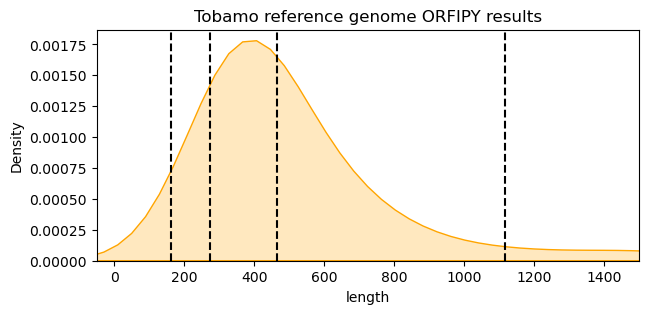

In [5]:
fig, ax = plt.subplots(figsize=(7,3))
fig = sns.kdeplot(df.length, fill=True, color='orange')

# Add vertical lines
vertical_lines = [1115.04, 272.81, 463.94, 160.74]  # List of x-values for vertical lines
for x in vertical_lines:
    ax.axvline(x=x, color='black', linestyle='--')

ax.set_xlim(-50, 1500)
ax.set_title('Tobamo reference genome ORFIPY results')

In [7]:
pd.set_option('display.max_colwidth', None)
df

,orf_name,orf_start,orf_end,orientation,length,frame,start,stop
0,k141_631436_flag_1_multi_1.0000_len_734_SRR6846476_ORF.1,127,592,+,465,2,CTC,TAA
1,k141_631436_flag_1_multi_1.0000_len_734_SRR6846476_ORF.2,147,450,-,303,-3,TTA,TAA
2,k141_367450_flag_0_multi_1.0000_len_609_SRR6846476_ORF.1,1,322,+,321,2,CCT,TAA
3,k141_1451694_flag_1_multi_0.9528_len_607_SRR6846476_ORF.1,304,607,+,303,2,CTG,NA
4,k141_1175340_flag_1_multi_1.0000_len_626_SRR6846476_ORF.1,53,362,+,309,3,TAC,TAA
...,...,...,...,...,...,...,...,...
3761,NODE_2_length_3626_cov_0.985424_SRR9665731_ORF.3,466,826,-,360,-2,GGC,TAA
3762,NODE_2_length_3626_cov_0.985424_SRR9665731_ORF.4,3150,3495,-,345,-3,TCA,TAG
3763,NODE_164_length_702_cov_1.326957_SRR9665731_ORF.1,0,702,+,702,1,CTT,NA
3764,NODE_10536_length_2129_cov_1.942008_SRR9960038_ORF.1,1338,2127,-,789,-3,AAG,TAG
